<a href="https://colab.research.google.com/github/LVA0412/infa_lyamkin/blob/main/DE_Work6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Инжиниринг данных. Практическая работа 6. Предварительная обработка данных в Python.**  *Выполнил Лямкин В.А.*

Упражнение для самостоятельного выполнения:
1. В хранилищах открытых наборов данных выберите датасет:
 https://www.kaggle.com/datasets
 https://opendata.cityofnewyork.us/data/
 https://habr.com/ru/post/452392/
2. Выполните предварительную обработку данных датасета. Проведите анализ данных (небольшая задача, используя известные методы), визуализируйте полученные результаты.
3. Код представленного в качестве ответа notebook должен сопровождаться комментариями.

На Kaggle.com выбран датасет "Chocolate Bar Ratings" - expert ratings of over 1,700 chocolate bars. Проведем предварительную обработку датасета и анализ данных

In [4]:
#импортируем библиотеки
import pandas as pd 
import math
import scipy
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [83]:
# Загрузим данные из файла
df = pd.read_csv('flavors_of_cacao.csv', delimiter = ',')

In [6]:
# информация о данных в датафрейме: сколько строк, какие данные в столбцах,
# сколько пропущенных значений (Nan-values)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [7]:
# Проверим есть ли в датасете дубликаты. если есть удалим
df.duplicated().sum()

0

In [8]:
#посмотрим на данные
df.head(10)


,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [9]:
df.tail(15)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
1780,Zotter,Amazonas Frucht,801,2012,65%,Austria,3.50,,
1781,Zotter,"Satipo Pangoa region, 16hr conche",875,2012,70%,Austria,3.00,Criollo (Amarru),Peru
1782,Zotter,"Satipo Pangoa region, 20hr conche",875,2012,70%,Austria,3.50,Criollo (Amarru),Peru
1783,Zotter,"Loma Los Pinos, Yacao region, D.R.",875,2012,62%,Austria,3.75,,Dominican Republic
1784,Zotter,El Oro,879,2012,75%,Austria,3.00,Forastero (Nacional),Ecuador
1785,Zotter,Huiwani Coop,879,2012,75%,Austria,3.00,"Criollo, Trinitario",Papua New Guinea
1786,Zotter,El Ceibo Coop,879,2012,90%,Austria,3.25,,Bolivia
1787,Zotter,Santo Domingo,879,2012,70%,Austria,3.75,,Dominican Republic
1788,Zotter,"Kongo, Highlands",883,2012,68%,Austria,3.25,Forastero,Congo
1789,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,


Какие столбцы категориальные, а какие численные 

In [10]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно 


# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['Company\xa0\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name', 'Cocoa\nPercent', 'Company\nLocation', 'Bean\nType', 'Broad Bean\nOrigin'] 
 Число столблцов =  6
Числовые данные:	  ['REF', 'Review\nDate', 'Rating'] 
 Число столблцов =  3


Переименуем столбцы для удобства работы

In [88]:
df.rename(columns = {
          'Company\xa0\n(Maker-if known)' : 'Company', 
          'Specific Bean Origin\nor Bar Name' : 'BarName', 
          'Cocoa\nPercent' : 'CocoaPercent',
          'Company\nLocation' : 'CompanyLocation',
          'Bean\nType' : 'BeanType',
          'Broad Bean\nOrigin' : 'BroadBeanOrigin',
          'Review\nDate' : 'ReviewDate',
          }, inplace = True) 

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1795 non-null   object 
 1   BarName          1795 non-null   object 
 2   REF              1795 non-null   int64  
 3   ReviewDate       1795 non-null   int64  
 4   CocoaPercent     1795 non-null   object 
 5   CompanyLocation  1795 non-null   object 
 6   Rating           1795 non-null   float64
 7   BeanType         1794 non-null   object 
 8   BroadBeanOrigin  1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


Переведем данные в столбце CocoaPercent в числовой формат

In [89]:
df["CocoaPercent"]= df["CocoaPercent"].str.replace('%','')

In [91]:
df = df.astype({'CocoaPercent': np.float64})

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1795 non-null   object 
 1   BarName          1795 non-null   object 
 2   REF              1795 non-null   int64  
 3   ReviewDate       1795 non-null   int64  
 4   CocoaPercent     1795 non-null   int64  
 5   CompanyLocation  1795 non-null   object 
 6   Rating           1795 non-null   float64
 7   BeanType         1794 non-null   object 
 8   BroadBeanOrigin  1794 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 126.3+ KB


Еще раз выведем какие столбцы категориальные, а какие численные

In [92]:
cat_columns = []
num_columns = [] 
for column_name in df.columns: 
    if (df[column_name].dtypes == object): 
        cat_columns +=[column_name] 
    else:
        num_columns +=[column_name] 
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))
print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Company', 'BarName', 'CompanyLocation', 'BeanType', 'BroadBeanOrigin'] 
 Число столблцов =  5
Числовые данные:	  ['REF', 'ReviewDate', 'CocoaPercent', 'Rating'] 
 Число столблцов =  4


In [93]:
df

,Company,BarName,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India


In [94]:
# Создадим новый двоичный атрибут по проценту содержания какао в батончике
# установим пороговое значание в 70% содержания какао
from sklearn.preprocessing import Binarizer
array = df.values
X = array[:,4:5]
binarizer = Binarizer(threshold = 69).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
np.set_printoptions(precision = 3)
print(binaryX[0:5,:])

[[0.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [95]:
#Расширенный новыми атрибутами датафрейм сохраним под именем df2
df2 = df
df2["CocoaBin"] = binaryX
print(df2)

       Company             BarName   REF  ReviewDate  CocoaPercent  \
0     A. Morin         Agua Grande  1876        2016          63.0   
1     A. Morin               Kpime  1676        2015          70.0   
2     A. Morin              Atsane  1676        2015          70.0   
3     A. Morin               Akata  1680        2015          70.0   
4     A. Morin              Quilla  1704        2015          70.0   
...        ...                 ...   ...         ...           ...   
1790    Zotter                Peru   647        2011          70.0   
1791    Zotter               Congo   749        2011          65.0   
1792    Zotter        Kerala State   749        2011          65.0   
1793    Zotter        Kerala State   781        2011          62.0   
1794    Zotter  Brazil, Mitzi Blue   486        2010          65.0   

     CompanyLocation  Rating   BeanType BroadBeanOrigin  CocoaBin  
0             France    3.75                   Sao Tome       0.0  
1             France   

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1795 non-null   object 
 1   BarName          1795 non-null   object 
 2   REF              1795 non-null   int64  
 3   ReviewDate       1795 non-null   int64  
 4   CocoaPercent     1795 non-null   float64
 5   CompanyLocation  1795 non-null   object 
 6   Rating           1795 non-null   float64
 7   BeanType         1794 non-null   object 
 8   BroadBeanOrigin  1794 non-null   object 
 9   CocoaBin         1795 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 140.4+ KB


In [97]:
# Отмасштабируем рейтинг в диапазон 0..1
array = df2.values
X2 = array[:,6:7]
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(X2)
# summarize transformed data
np.set_printoptions(precision=3)
df2["ReScaleRating"] =  rescaledX
df2

,Company,BarName,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin,CocoaBin,ReScaleRating
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome,0.0,0.6875
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo,1.0,0.4375
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo,1.0,0.5000
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo,1.0,0.6250
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru,1.0,0.6250
...,...,...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru,1.0,0.6875
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo,0.0,0.5000
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India,0.0,0.6250
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India,0.0,0.5625


Воспользуемся функцией get_dummies , чтобы конвертировать категориальный атрибут CompanyLocation в числовой

In [98]:
pd.get_dummies(df2["CompanyLocation"])

,Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,...,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1791,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1792,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1793,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Опробуем логарифмирование на примере атрибута ReviewDate

In [99]:
r2 = df2.ReviewDate
R2log = np.log(r2)
df2["r2log"] = R2log
df2

,Company,BarName,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin,CocoaBin,ReScaleRating,r2log
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome,0.0,0.6875,7.608871
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo,1.0,0.4375,7.608374
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo,1.0,0.5000,7.608374
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo,1.0,0.6250,7.608374
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru,1.0,0.6250,7.608374
...,...,...,...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru,1.0,0.6875,7.606387
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo,0.0,0.5000,7.606387
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India,0.0,0.6250,7.606387
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India,0.0,0.5625,7.606387


In [100]:
# В датасете у 887 строк атрибут BeanType пустой символ с кодом 160 
# заменим на значение артибута "UnDefAttr"

df3 = df.loc[(df['BeanType'] == " ")]

In [101]:
df3

,Company,BarName,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin,CocoaBin,ReScaleRating,r2log
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome,0.0,0.6875,7.608871
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo,1.0,0.4375,7.608374
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo,1.0,0.5000,7.608374
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo,1.0,0.6250,7.608374
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru,1.0,0.6250,7.608374
...,...,...,...,...,...,...,...,...,...,...,...,...
1787,Zotter,Santo Domingo,879,2012,70.0,Austria,3.75,,Dominican Republic,1.0,0.6875,7.606885
1789,Zotter,"Indianer, Raw",883,2012,58.0,Austria,3.50,,,0.0,0.6250,7.606885
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru,1.0,0.6875,7.606387
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India,0.0,0.5625,7.606387


In [102]:
df3.loc[(df3.BeanType == " "), 'BeanType'] = "UnDefAttr"

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [103]:
df3

,Company,BarName,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin,CocoaBin,ReScaleRating,r2log
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,UnDefAttr,Sao Tome,0.0,0.6875,7.608871
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,UnDefAttr,Togo,1.0,0.4375,7.608374
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,UnDefAttr,Togo,1.0,0.5000,7.608374
3,A. Morin,Akata,1680,2015,70.0,France,3.50,UnDefAttr,Togo,1.0,0.6250,7.608374
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,UnDefAttr,Peru,1.0,0.6250,7.608374
...,...,...,...,...,...,...,...,...,...,...,...,...
1787,Zotter,Santo Domingo,879,2012,70.0,Austria,3.75,UnDefAttr,Dominican Republic,1.0,0.6875,7.606885
1789,Zotter,"Indianer, Raw",883,2012,58.0,Austria,3.50,UnDefAttr,,0.0,0.6250,7.606885
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,UnDefAttr,Peru,1.0,0.6875,7.606387
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,UnDefAttr,India,0.0,0.5625,7.606387


In [104]:
df.describe()

,REF,ReviewDate,CocoaPercent,Rating,CocoaBin,ReScaleRating,r2log
count,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,71.698329,3.185933,0.817270,0.546483,7.607045
std,552.886365,2.927210,6.323118,0.478062,0.386553,0.119516,0.001455
min,5.000000,2006.000000,42.000000,1.000000,0.000000,0.000000,7.603898
25%,576.000000,2010.000000,70.000000,2.875000,1.000000,0.468750,7.605890
50%,1069.000000,2013.000000,70.000000,3.250000,1.000000,0.562500,7.607381
75%,1502.000000,2015.000000,75.000000,3.500000,1.000000,0.625000,7.608374
max,1952.000000,2017.000000,100.000000,5.000000,1.000000,1.000000,7.609367


Краткое резюме.
Опробованны следующие операции:
*   Перевод категориальных атрибутов в числовые.
*   Стандартизировать/Нормализовать атрибуты.
*   Логарифмировать атрибуты.
*   Заполнить пустые/Nan-значения.




Выберем лучшие по рейтингу батончики из темного шоколада произведенные компаниями из Швейцарии

In [116]:
df3 = df.loc[(df['CompanyLocation'] == "Switzerland") & (df['CocoaPercent'] >= 70)].sort_values('Rating',ascending=False)

In [117]:
df3.head(5)

,Company,BarName,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin,CocoaBin,ReScaleRating,r2log
865,Idilio (Felchlin),"Sur del Lago, Amiari Meridena, Zulia, w/ nibs",737,2011,72.0,Switzerland,4.0,,Venezuela,1.0,0.75,7.606387
864,Idilio (Felchlin),Coopertiva Amazona w/ nibs,737,2011,72.0,Switzerland,4.0,Criollo,Venezuela,1.0,0.75,7.606387
863,Idilio (Felchlin),"Carenero Superior, Urrutia, Barlovento",737,2011,70.0,Switzerland,4.0,Trinitario,Venezuela,1.0,0.75,7.606387
186,Beschle (Felchlin),Ecuador,636,2011,72.0,Switzerland,4.0,,Ecuador,1.0,0.75,7.606387
861,Idilio (Felchlin),"Porcelana, Zulia",733,2011,74.0,Switzerland,4.0,Criollo,Venezuela,1.0,0.75,7.606387


In [124]:
# Вычислим средний рейтинг батончиков по странам производителям
# Оказалось, что лучший шоколад делают в Чили
df5 = df.groupby("CompanyLocation").Rating.mean()

In [130]:
df6 = df5.sort_values(ascending=False)

Визуализируем на диаграмме лушие страны производители шоколадных батончиков

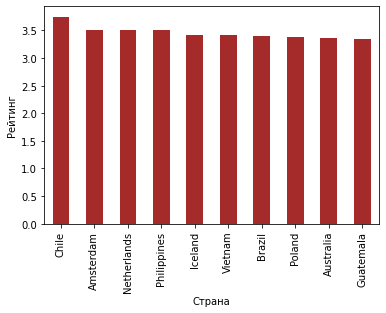

In [131]:
df6.head(10).plot(kind='bar', color='brown', legend=None, ylabel='Рейтинг', xlabel='Страна')